In [76]:
from scipy.optimize import curve_fit 
import numpy as np
import matplotlib.pyplot as plt

#данные
N_t=[0.770,1.040,1.380,1.560,2.049,2.489,2.669,3.099,3.149,3.189,3.959,3.699,4.069,4.449,4.489,4.399,4.449,4.189,
4.419,4.029,4.029,3.649,3.449,3.109,2.559,2.119,1.809,1.410,1.180,1.090,1.759,2.659,3.379,4.189,4.369,4.988,6.828,6.368,5.698,
5.548,5.388,4.359,3.129,2.279,1.480,0.970]

I_t= [0.60,0.80,1.00,1.10,1.20,1.30,1.40,1.50,1.60,1.70,1.80,1.90,2.00,2.10,2.20,2.30,2.40,2.50,2.60,2.70,2.80,2.90,3.00,3.10,
3.20,3.30,3.40,3.50,3.60,3.70,3.80,3.85,3.90,3.95,4.00,4.05,4.10,4.15,4.20,4.25,4.30,4.32,4.35,4.40,4.45,4.50]

N_t_error=[0.074,0.091,0.108,0.116,0.136,0.152,0.157,0.171,0.172,0.173,0.195,0.188,0.198,0.207,0.208,0.206,0.207,
0.201,0.206,0.197,0.197,0.186,0.181,0.171,0.154,0.139,0.127,0.109,0.098,0.093,0.125,0.157,0.179,0.201,0.205,0.220,0.259,0.250,
0.236,0.233,0.229,0.205,0.172,0.144,0.113,0.087]

I_t_error= 0.01

N_bg=[0.707,0.403]
I_bg=[0,5.98]
N_bg_error=[0.841,0.635]
I_error= 0.01

Выясним фон для каждой точки и найдем чистую интенсивность $N$

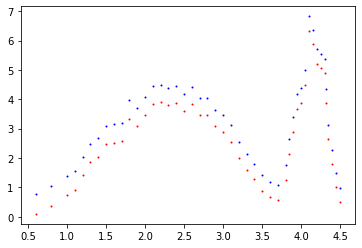

In [77]:
#выясняем фон
z = np.polyfit(I_bg, N_bg, 1)
f = np.poly1d(z)
    
#вычитаем фон
N = [i for i in range(len(N_t))]
for i in range (len(I_t)):
    N[i] = N_t[i] - (f.c[0] * I_t[i] + f.c[1])

plt.plot(I_t, N_t, color = 'blue', marker ='o',linestyle='None', markersize = 1) #точечный график без учета фона
plt.plot(I_t, N, color = 'red', marker ='o',linestyle='None', markersize = 1) #с учетом фона

def mapping(x, a, b): 
    return a * x + b #задание целевой функции, которой мы апроксимируем

args, _ = curve_fit(mapping, I_bg, N_bg) #нашли аргументы целевой функции
a, b = args[0], args[1]
y_fit = [i for i in range(len(I_bg))]
for i in range (len(I_bg)):
    y_fit[i] = a * I_bg[i] + b

Апроксимируем график с учетом фона

[4.6499905 +0.j         4.19430625+0.j         4.12831021+0.j
 2.87481152+0.45429162j 2.87481152-0.45429162j 1.95012589+0.47747131j
 1.95012589-0.47747131j 0.9051554 +0.41621258j 0.9051554 -0.41621258j
 0.48469749+0.j        ]


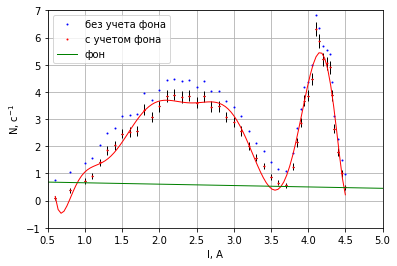

In [78]:
z_gr = np.polyfit(I_t, N, 10)
f_gr = np.poly1d(z_gr)
f_new = np.linspace(I_t[0], I_t[-1], 100)
l_new = f_gr(f_new)

fig = plt.figure()

#считаем корни уравнения P(x) = 5,5
print(np.roots([ 0.301412133, -7.51043383,  81.3557050, -5.03106126e+02,
  1.96100624e+03, -5.01762816e+03,  8.50560970e+03, -9.39942144e+03,
  6.45968187e+03, -2.48329370e+03,  3.9866117e+02]))

plt.plot(I_t, N_t, color = 'blue', marker ='o',linestyle='None', markersize = 1, label='без учета фона') #точечный график без учета фона
plt.plot(I_t, N, color = 'red', marker ='o',linestyle='None', markersize = 1, label='с учетом фона') #с учетом фона
plt.errorbar(I_t, N, yerr = N_t_error, xerr = I_t_error,fmt='none',ecolor = 'black',elinewidth = 1)
plt.plot(f_new, l_new,color = 'red', linewidth = 1)# апроксимация кривой

plt.plot(I_bg,N_bg,color = 'green', marker ='o',linestyle='None', markersize = 1) #фон
plt.plot(I_bg, y_fit, color = 'green', linewidth = 1, label='фон') #апроксимирующая прямая


plt.xlabel("I, А")
plt.ylabel("N, с$^{-1}$")
plt.axis([0.5, 5, -1, 7])
plt.legend() #легенда
plt.grid(True) 
plt.show()
fig.savefig('N(I).png', dpi = 1000)

Получим график Ферми-Кюри

In [87]:
#данные
f=[173,225,224,217,237,241,226,224,206,190,199,176,173,170,159,147,139,126,123,110,104,94,86,77,65,55,47,38,31,28,40,51,58,64,
65,68,80,75,70,67,65,58,47,38,28,19]

E= [20,36,55,66,78,90,103,117,132,147,162,178,195,212,229,247,265,284,303,322,341,361,380,400,421,441,462,483,504,525,546,557,
567,578,589,600,611,621,632,643,654,658,665,676,687,698]

f_error=[0.59,0.38,0.27,0.24,0.21,0.19,0.17,0.15,0.14,0.13,0.12,0.11,0.10,0.09,0.09,0.08,0.08,0.07,0.07,0.06,0.06,
0.06,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03]

E_error = 3


46 46


Построим апроксимирующую прямую

-0.4707128139430283 264.0716226012522


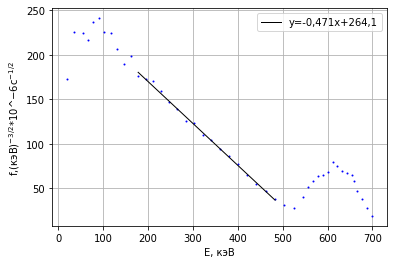

In [95]:
fig = plt.figure()
E_app = [178,195,212,229,247,265,284,303,322,341,361,380,400,421,441,462,483]
f_app = [176,173,170,159,147,139,126,123,110,104,94,86,77,65,55,47,38]
f_app_error = [0.11,0.10,0.09,0.09,0.08,0.08,0.07,0.07,0.06,0.06,
0.06,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04]

def mapping(x, a, b): 
    return a * x + b #задание целевой функции, которой мы апроксимируем

args, _ = curve_fit(mapping, E_app, f_app) #нашли аргументы целевой функции
a, b = args[0], args[1]
f_fit = [i for i in range(len(E_app))]
for i in range (len(E_app)):
    f_fit[i] = a * E_app[i] + b

print (a,b)



plt.plot(E, f, color = 'blue', marker ='o',linestyle='None', markersize = 1)
plt.plot(E_app, f_fit, color = 'black',linewidth = 1, label='y=-0,471x+264,1')

plt.xlabel("E, кэВ")
plt.ylabel("f,(кэВ)$^{-3/2}$*10^${-6}$c$^{-1/2}$")
#plt.axis([0.5, 5, -1, 7])
plt.legend() #легенда
plt.grid(True) 
plt.show()
fig.savefig('f(E).png', dpi = 1000)